In [9]:
import pandas as pd 
import numpy as np

In [10]:
df=pd.read_csv('bitcoin_dataset.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [11]:
df.shape

(2906, 24)

In [12]:
(df.isnull().sum()/2906)*100

Date                                                   0.000000
btc_market_price                                       0.000000
btc_total_bitcoins                                     0.929112
btc_market_cap                                         0.000000
btc_trade_volume                                       0.722643
btc_blocks_size                                        0.997935
btc_avg_block_size                                     0.000000
btc_n_orphaned_blocks                                  0.000000
btc_n_transactions_per_block                           0.000000
btc_median_confirmation_time                           0.412939
btc_hash_rate                                          0.000000
btc_difficulty                                         0.550585
btc_miners_revenue                                     0.000000
btc_transaction_fees                                   0.344116
btc_cost_per_transaction_percent                       0.000000
btc_cost_per_transaction                

null values are less than 1 percent so we drop them it won't effect much

In [13]:
df.dropna(inplace=True)

In [15]:
#btc_n_transactions_excluding_popular  ,   btc_n_transactions_excluding_chains_longer_than_100,   

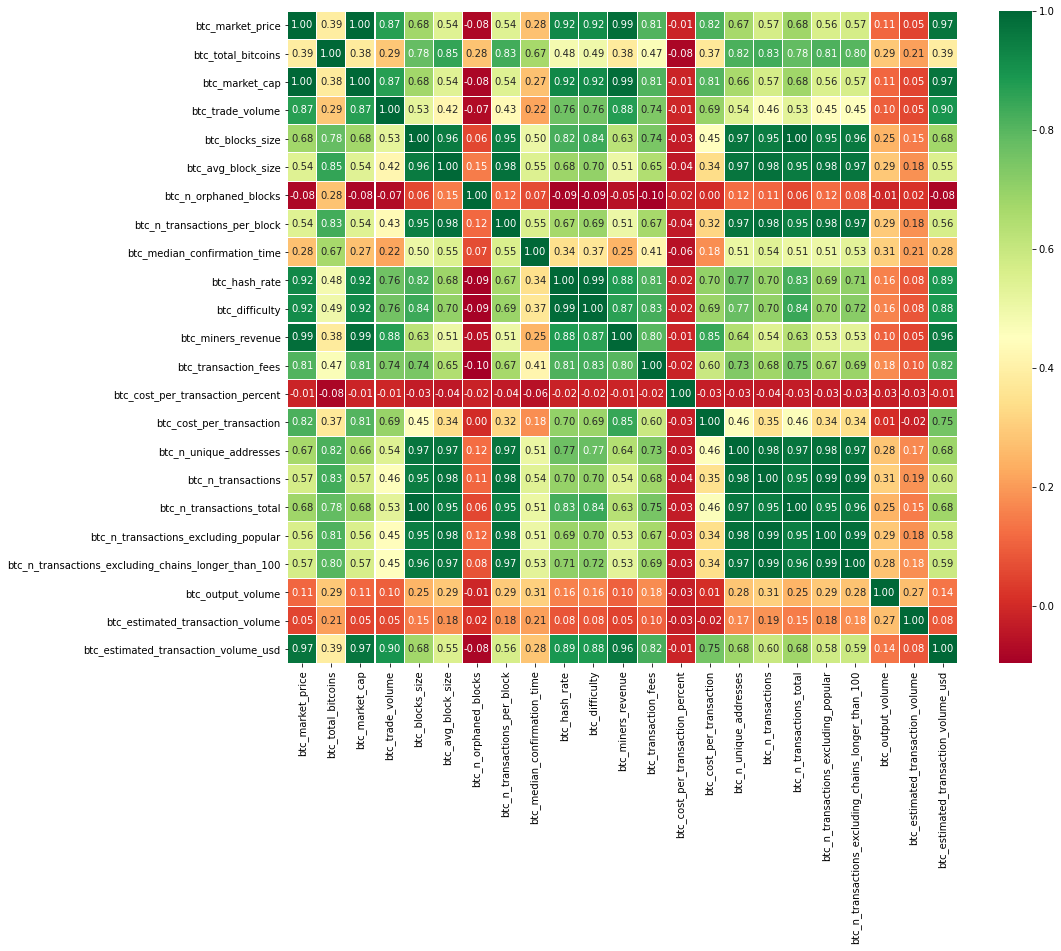

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(method='pearson'),annot=True,cmap='RdYlGn',linewidths=0.1,yticklabels=True,fmt='0.2f')
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.show()

In [17]:
x=df.drop(['btc_market_price'],axis=1)

In [18]:
y=df['btc_market_price']

In [19]:
y

0           0.00000
1           0.00000
2           0.00000
3           0.00000
4           0.00000
           ...     
2901    11524.77667
2902    11765.71000
2903    11212.65500
2904    10184.06167
2905    10125.01333
Name: btc_market_price, Length: 2791, dtype: float64

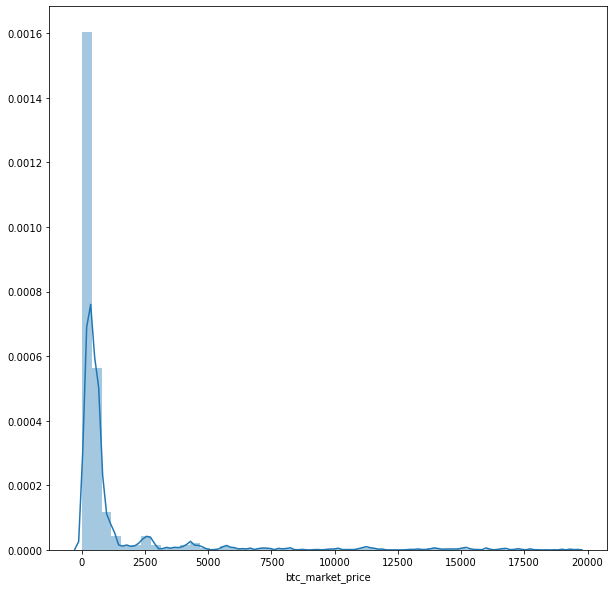

In [20]:
f,ax=plt.subplots(figsize=(10,10))
sns.distplot(y)

In [21]:
corr=df.corr()

In [22]:
corr.iloc[0]*100

btc_market_price                                       100.000000
btc_total_bitcoins                                      39.038536
btc_market_cap                                          99.978480
btc_trade_volume                                        86.977858
btc_blocks_size                                         67.671478
btc_avg_block_size                                      54.403458
btc_n_orphaned_blocks                                   -7.742746
btc_n_transactions_per_block                            54.469041
btc_median_confirmation_time                            27.571201
btc_hash_rate                                           92.331454
btc_difficulty                                          91.822529
btc_miners_revenue                                      98.706942
btc_transaction_fees                                    81.046969
btc_cost_per_transaction_percent                        -1.354004
btc_cost_per_transaction                                81.696573
btc_n_uniq

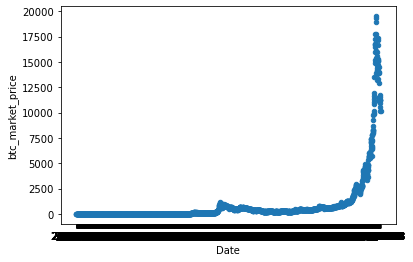

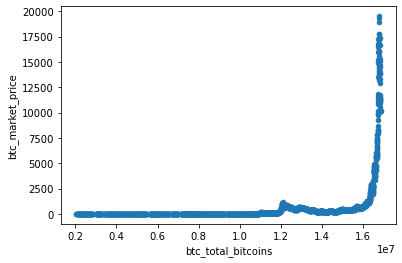

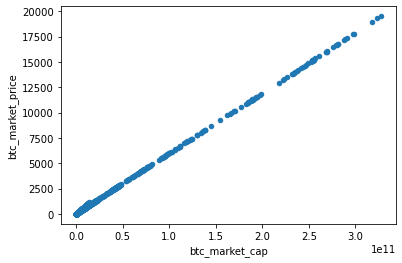

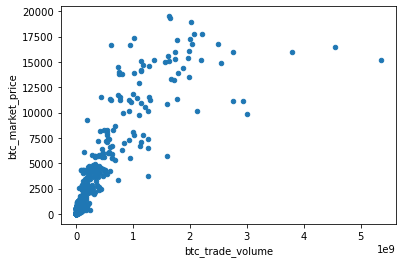

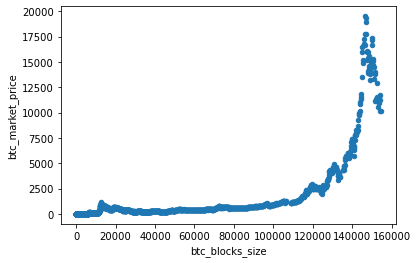

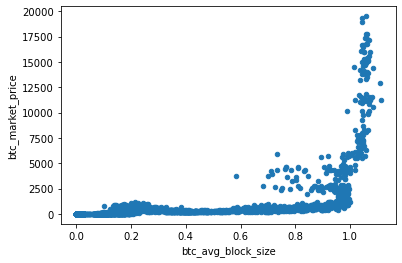

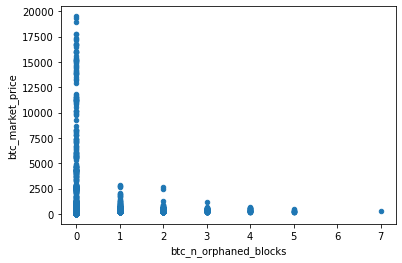

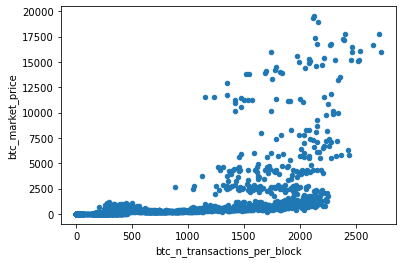

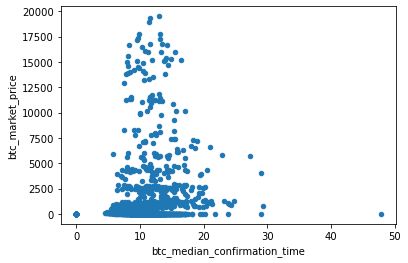

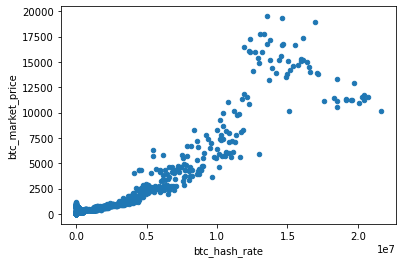

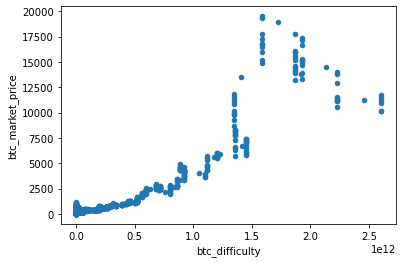

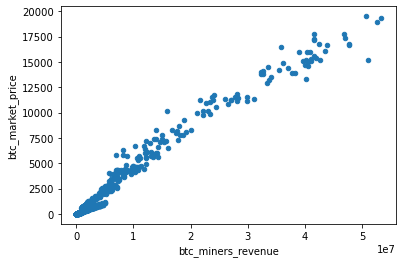

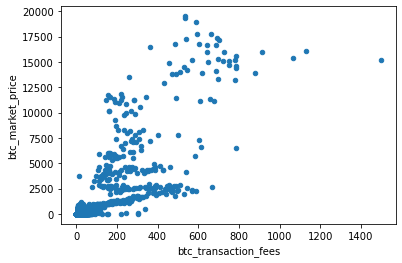

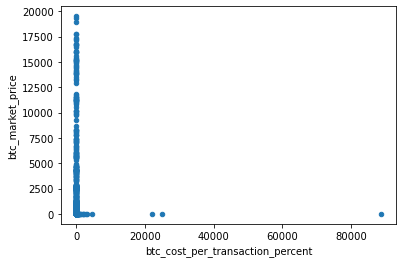

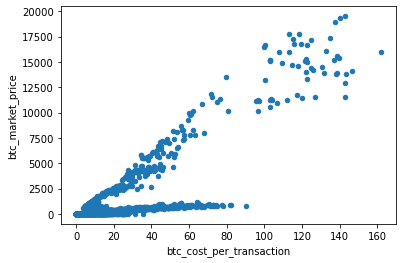

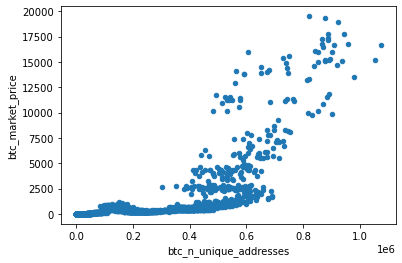

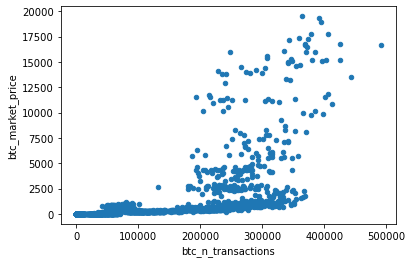

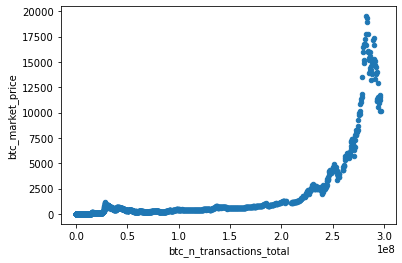

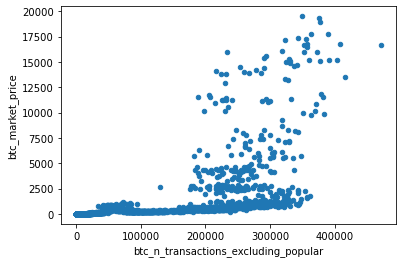

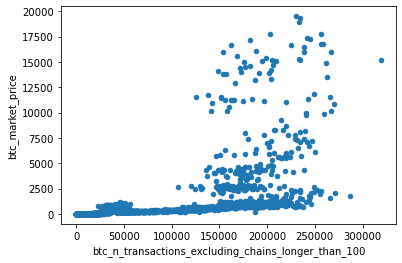

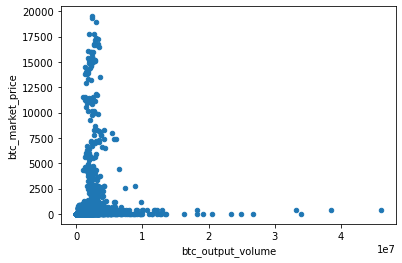

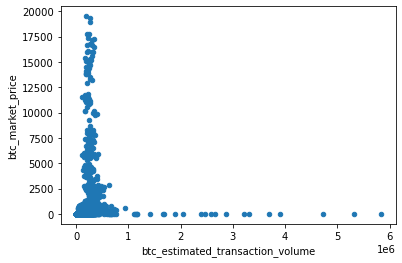

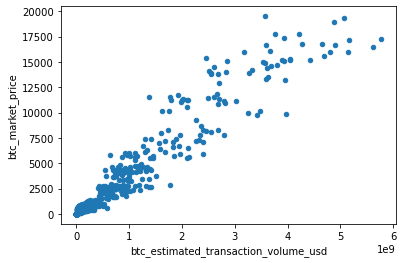

In [23]:
for col in x.columns:
    data=pd.concat([x[col],df['btc_market_price']],axis=1)
    data.plot.scatter(x=col,y='btc_market_price')
    plt.show()
    

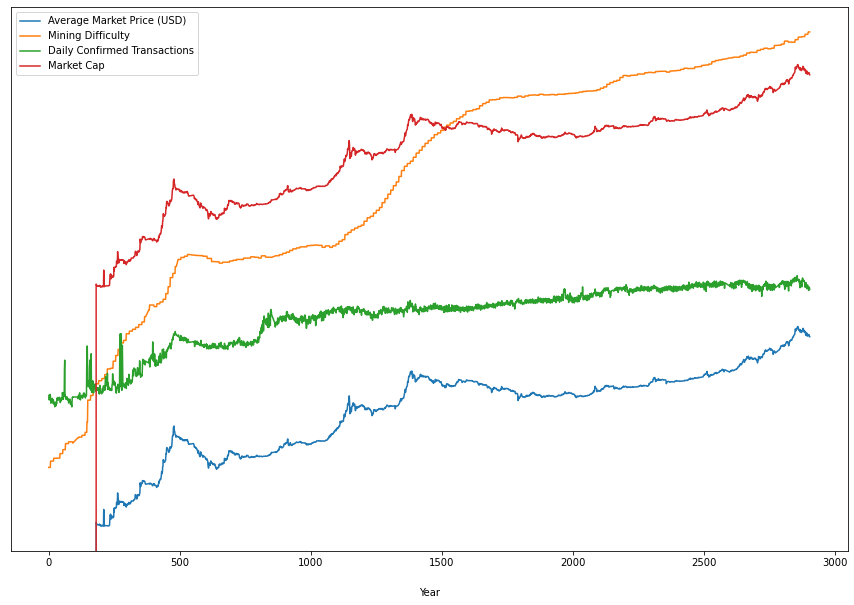

In [24]:
labels=list(df['Date'])
last_seen=['2010']
index=[0]
for i in range(len(labels)):
    labels[i]=labels[i].split('/')[2]
    if labels[i]!=last_seen[-1]:
        last_seen.append(labels[i])
        index.append(i)
plt.plot(df['btc_market_price'], label='Average Market Price (USD)')
plt.plot(df['btc_difficulty'], label='Mining Difficulty')
plt.plot(df['btc_n_transactions'], label='Daily Confirmed Transactions')
plt.plot(df['btc_market_cap'], label='Market Cap')
plt.gca().set_yscale("log")
plt.yticks([])
#plt.xticks(index, last_seen)
plt.xlabel('Year', labelpad=20)
plt.gcf().set_size_inches(15, 10)
plt.legend()
plt.show()
    

In [25]:
x.columns

Index(['Date', 'btc_total_bitcoins', 'btc_market_cap', 'btc_trade_volume',
       'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks',
       'btc_n_transactions_per_block', 'btc_median_confirmation_time',
       'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction_percent',
       'btc_cost_per_transaction', 'btc_n_unique_addresses',
       'btc_n_transactions', 'btc_n_transactions_total',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [26]:
corr.iloc[1].sort_values(ascending=False).head()

btc_total_bitcoins              1.000000
btc_avg_block_size              0.850936
btc_n_transactions              0.832103
btc_n_transactions_per_block    0.830744
btc_n_unique_addresses          0.819057
Name: btc_total_bitcoins, dtype: float64

In [27]:
cols_to_remove=['btc_market_price','btc_miners_revenue','btc_n_transactions_total','btc_n_unique_addresses',
                'btc_n_transactions_excluding_popular','btc_estimated_transaction_volume_usd',
                'btc_n_transactions_excluding_chains_longer_than_100','btc_n_transactions',
              'btc_n_transactions_excluding_chains_longer_than_100','btc_avg_block_size' ,'btc_difficulty','Date']

In [28]:
corr.iloc[2].sort_values(ascending=False).head()

btc_market_cap                          1.000000
btc_market_price                        0.999785
btc_miners_revenue                      0.985764
btc_estimated_transaction_volume_usd    0.969280
btc_hash_rate                           0.924555
Name: btc_market_cap, dtype: float64

In [29]:
corr.iloc[3].sort_values(ascending=False).head()

btc_trade_volume                        1.000000
btc_estimated_transaction_volume_usd    0.896081
btc_miners_revenue                      0.875165
btc_market_cap                          0.870260
btc_market_price                        0.869779
Name: btc_trade_volume, dtype: float64

In [30]:
corr.iloc[4].sort_values(ascending=False).head()

btc_blocks_size                                        1.000000
btc_n_transactions_total                               0.999778
btc_n_unique_addresses                                 0.967028
btc_n_transactions_excluding_chains_longer_than_100    0.961017
btc_avg_block_size                                     0.956417
Name: btc_blocks_size, dtype: float64

In [31]:
corr.iloc[5].sort_values(ascending=False).head()

btc_avg_block_size                                     1.000000
btc_n_transactions                                     0.977265
btc_n_transactions_per_block                           0.977196
btc_n_transactions_excluding_popular                   0.975435
btc_n_transactions_excluding_chains_longer_than_100    0.968294
Name: btc_avg_block_size, dtype: float64

In [32]:
corr.iloc[6].sort_values(ascending=False).head()

btc_n_orphaned_blocks                   1.000000
btc_total_bitcoins                      0.278020
btc_avg_block_size                      0.148971
btc_n_unique_addresses                  0.123435
btc_n_transactions_excluding_popular    0.117675
Name: btc_n_orphaned_blocks, dtype: float64

In [33]:
corr.iloc[7].sort_values(ascending=False).head()

btc_n_transactions_per_block                           1.000000
btc_n_transactions                                     0.980265
btc_avg_block_size                                     0.977196
btc_n_transactions_excluding_popular                   0.975778
btc_n_transactions_excluding_chains_longer_than_100    0.974591
Name: btc_n_transactions_per_block, dtype: float64

In [34]:
corr.iloc[8].sort_values(ascending=False).head()

btc_median_confirmation_time    1.000000
btc_total_bitcoins              0.666530
btc_n_transactions_per_block    0.554911
btc_avg_block_size              0.549520
btc_n_transactions              0.540060
Name: btc_median_confirmation_time, dtype: float64

In [35]:
df1=df.drop(cols_to_remove,axis=1)
df1.head()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_output_volume,btc_estimated_transaction_volume
0,2043200.0,0.0,0.0,0.0,0,1.0,0.0,0.000029,0.0,31.781022,0.0,65173.13,36500.0
1,2054650.0,0.0,0.0,0.0,0,1.0,0.0,0.000029,0.0,154.463801,0.0,18911.74,7413.0
2,2063600.0,0.0,0.0,0.0,0,1.0,0.0,0.000023,0.0,1278.516635,0.0,9749.98,700.0
3,2074700.0,0.0,0.0,0.0,0,1.0,0.0,0.000028,0.0,22186.687990,0.0,11150.03,50.0
4,2085400.0,0.0,0.0,0.0,0,1.0,0.0,0.000027,0.0,689.179876,0.0,12266.83,1553.0


In [36]:
corr2=df1.corr()

In [37]:
corr2

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_output_volume,btc_estimated_transaction_volume
btc_total_bitcoins,1.000000,0.382558,0.286133,0.777524,0.278020,0.830744,0.666530,0.483286,0.467124,-0.081161,0.371351,0.289276,0.207422
btc_market_cap,0.382558,1.000000,0.870260,0.675104,-0.081564,0.542403,0.272588,0.924555,0.811003,-0.012940,0.807154,0.110743,0.049470
btc_trade_volume,0.286133,0.870260,1.000000,0.527072,-0.070331,0.433781,0.218220,0.764058,0.736983,-0.009475,0.691620,0.095981,0.054143
btc_blocks_size,0.777524,0.675104,0.527072,1.000000,0.056526,0.946936,0.503175,0.823228,0.744965,-0.030367,0.449656,0.248305,0.149444
btc_n_orphaned_blocks,0.278020,-0.081564,-0.070331,0.056526,1.000000,0.116194,0.065787,-0.091324,-0.096990,-0.016069,0.004397,-0.007548,0.016561
btc_n_transactions_per_block,0.830744,0.542403,0.433781,0.946936,0.116194,1.000000,0.554911,0.667065,0.666951,-0.036561,0.319823,0.293431,0.181676
btc_median_confirmation_time,0.666530,0.272588,0.218220,0.503175,0.065787,0.554911,1.000000,0.344450,0.414088,-0.056847,0.180035,0.306452,0.209027
btc_hash_rate,0.483286,0.924555,0.764058,0.823228,-0.091324,0.667065,0.344450,1.000000,0.812348,-0.015798,0.700391,0.158165,0.079096
btc_transaction_fees,0.467124,0.811003,0.736983,0.744965,-0.096990,0.666951,0.414088,0.812348,1.000000,-0.019066,0.595554,0.175662,0.100570
btc_cost_per_transaction_percent,-0.081161,-0.012940,-0.009475,-0.030367,-0.016069,-0.036561,-0.056847,-0.015798,-0.019066,1.000000,-0.025732,-0.025014,-0.027808


In [38]:
corr

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.390385,0.999785,0.869779,0.676715,0.544035,-0.077427,0.544690,0.275712,0.923315,...,-0.013540,0.816966,0.666254,0.570842,0.682193,0.559400,0.567658,0.110019,0.048918,0.969070
btc_total_bitcoins,0.390385,1.000000,0.382558,0.286133,0.777524,0.850936,0.278020,0.830744,0.666530,0.483286,...,-0.081161,0.371351,0.819057,0.832103,0.781682,0.813860,0.799113,0.289276,0.207422,0.387308
btc_market_cap,0.999785,0.382558,1.000000,0.870260,0.675104,0.541461,-0.081564,0.542403,0.272588,0.924555,...,-0.012940,0.807154,0.663176,0.568225,0.680340,0.556778,0.565283,0.110743,0.049470,0.969280
btc_trade_volume,0.869779,0.286133,0.870260,1.000000,0.527072,0.418645,-0.070331,0.433781,0.218220,0.764058,...,-0.009475,0.691620,0.544256,0.457498,0.531501,0.445550,0.453401,0.095981,0.054143,0.896081
btc_blocks_size,0.676715,0.777524,0.675104,0.527072,1.000000,0.956417,0.056526,0.946936,0.503175,0.823228,...,-0.030367,0.449656,0.967028,0.950547,0.999778,0.952453,0.961017,0.248305,0.149444,0.677311
btc_avg_block_size,0.544035,0.850936,0.541461,0.418645,0.956417,1.000000,0.148971,0.977196,0.549520,0.684328,...,-0.037274,0.336923,0.966606,0.977265,0.954604,0.975435,0.968294,0.292025,0.184697,0.554077
btc_n_orphaned_blocks,-0.077427,0.278020,-0.081564,-0.070331,0.056526,0.148971,1.000000,0.116194,0.065787,-0.091324,...,-0.016069,0.004397,0.123435,0.109478,0.056746,0.117675,0.075269,-0.007548,0.016561,-0.082181
btc_n_transactions_per_block,0.544690,0.830744,0.542403,0.433781,0.946936,0.977196,0.116194,1.000000,0.554911,0.667065,...,-0.036561,0.319823,0.965730,0.980265,0.945136,0.975778,0.974591,0.293431,0.181676,0.564988
btc_median_confirmation_time,0.275712,0.666530,0.272588,0.218220,0.503175,0.549520,0.065787,0.554911,1.000000,0.344450,...,-0.056847,0.180035,0.508800,0.540060,0.508689,0.505388,0.530541,0.306452,0.209027,0.281843
btc_hash_rate,0.923315,0.483286,0.924555,0.764058,0.823228,0.684328,-0.091324,0.667065,0.344450,1.000000,...,-0.015798,0.700391,0.767567,0.696451,0.826837,0.688954,0.707892,0.158165,0.079096,0.892695


In [42]:
corr2.iloc[12].sort_values(ascending=False)

btc_estimated_transaction_volume    1.000000
btc_output_volume                   0.267409
btc_median_confirmation_time        0.209027
btc_total_bitcoins                  0.207422
btc_n_transactions_per_block        0.181676
btc_blocks_size                     0.149444
btc_transaction_fees                0.100570
btc_hash_rate                       0.079096
btc_trade_volume                    0.054143
btc_market_cap                      0.049470
btc_n_orphaned_blocks               0.016561
btc_cost_per_transaction           -0.020040
btc_cost_per_transaction_percent   -0.027808
Name: btc_estimated_transaction_volume, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=0)

In [44]:
y_test.head()

2547    1050.110000
739        5.000730
2798    5711.205867
1053      13.548000
667        3.230000
Name: btc_market_price, dtype: float64

In [45]:
from sklearn import linear_model
 
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
 
y_predict = reg.predict(x_test)

In [46]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test,y_predict,)
R2_score=r2_score(y_test,y_predict)
print(mse)
print(R2_score)
 

498.1580867195254
0.9999291595892085


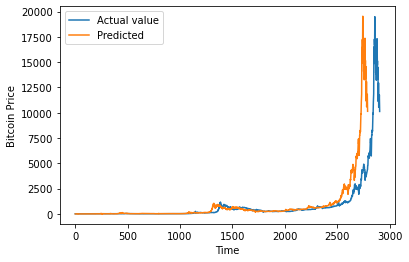

In [47]:
plt.plot(y,label='Actual value')
plt.plot(reg.predict(df1),label='Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()